In [ ]:
# Standards
import pandas as pd
import numpy as np
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Math & Stats
from statistics import mean
import math
# Scaling & PCA
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from factor_analyzer import FactorAnalyzer
from sklearn.decomposition import PCA
# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV
# ML Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
rnd_st = 17

In [ ]:
from statistics import stdev

In [ ]:
df = pd.read_csv('heart.csv')
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


#### Column Desc
Age: age of the patient [years]
Sex: sex of the patient [M: Male, F: Female]
ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
RestingBP: resting blood pressure [mm Hg]
Cholesterol: serum cholesterol [mm/dl]
FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
Oldpeak: oldpeak = ST [Numeric value measured in depression]
ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
HeartDisease: output class [1: heart disease, 0: Normal]

In [ ]:
round(df.describe(),2)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.00,918.00,918.00,918.00,918.00,918.00,918.00
mean,53.51,132.40,198.80,0.23,136.81,0.89,0.55
std,9.43,18.51,109.38,0.42,25.46,1.07,0.50
min,28.00,0.00,0.00,0.00,60.00,-2.60,0.00
25%,47.00,120.00,173.25,0.00,120.00,0.00,0.00
50%,54.00,130.00,223.00,0.00,138.00,0.60,1.00
75%,60.00,140.00,267.00,0.00,156.00,1.50,1.00
max,77.00,200.00,603.00,1.00,202.00,6.20,1.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

### Visualization

In [ ]:
# Numerical Data
# Age,RestingBP,Cholesterol,MaxHR,Oldpeak

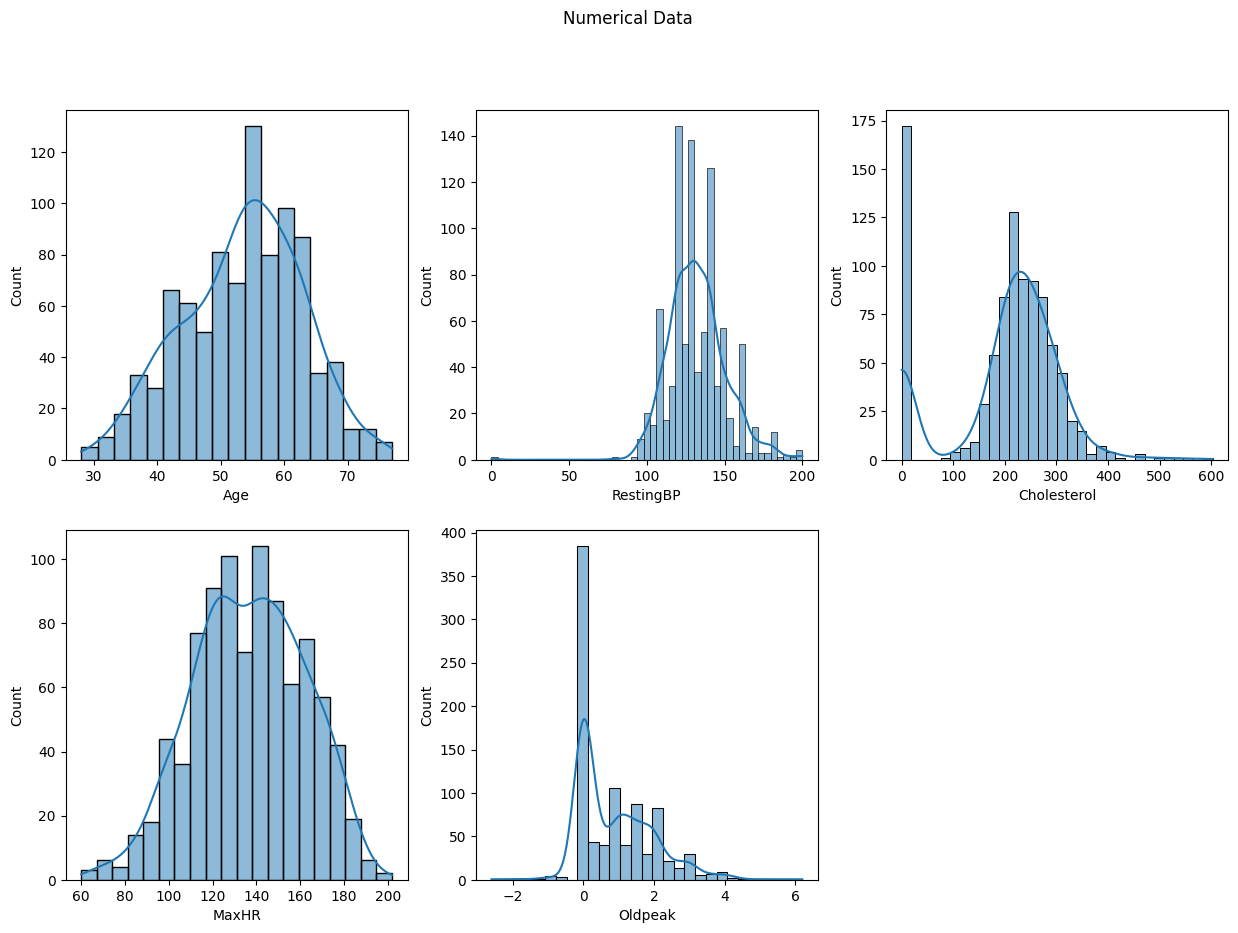

In [ ]:
fig, axes = plt.subplots(2,3,figsize = (15,10), sharey=False)
fig.suptitle('Numerical Data')
# Age,RestingBP,Cholesterol,MaxHR,Oldpeak
sns.histplot(ax = axes[0,0],data = df, x = 'Age', kde = True)
# Relatively normal dist with mean around 53 yrs old

sns.histplot(ax = axes[0,1],x = df.RestingBP, kde = True)
# Relatively normal dist there is an outlier around 0

sns.histplot(ax = axes[0,2],x = df.Cholesterol, kde = True)
# Relatively normal dist there are around 170 rows with cholesterol of around 0

sns.histplot(ax = axes[1,0],x = df.MaxHR, kde = True)
# Relatively normal dist (same more???)

sns.histplot(ax = axes[1,1],x = df.Oldpeak, kde = True)
# Dist positively skewed 

fig.delaxes(axes[1,2])

In [ ]:
# Categorical Data
# Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope

<AxesSubplot: xlabel='ST_Slope', ylabel='count'>

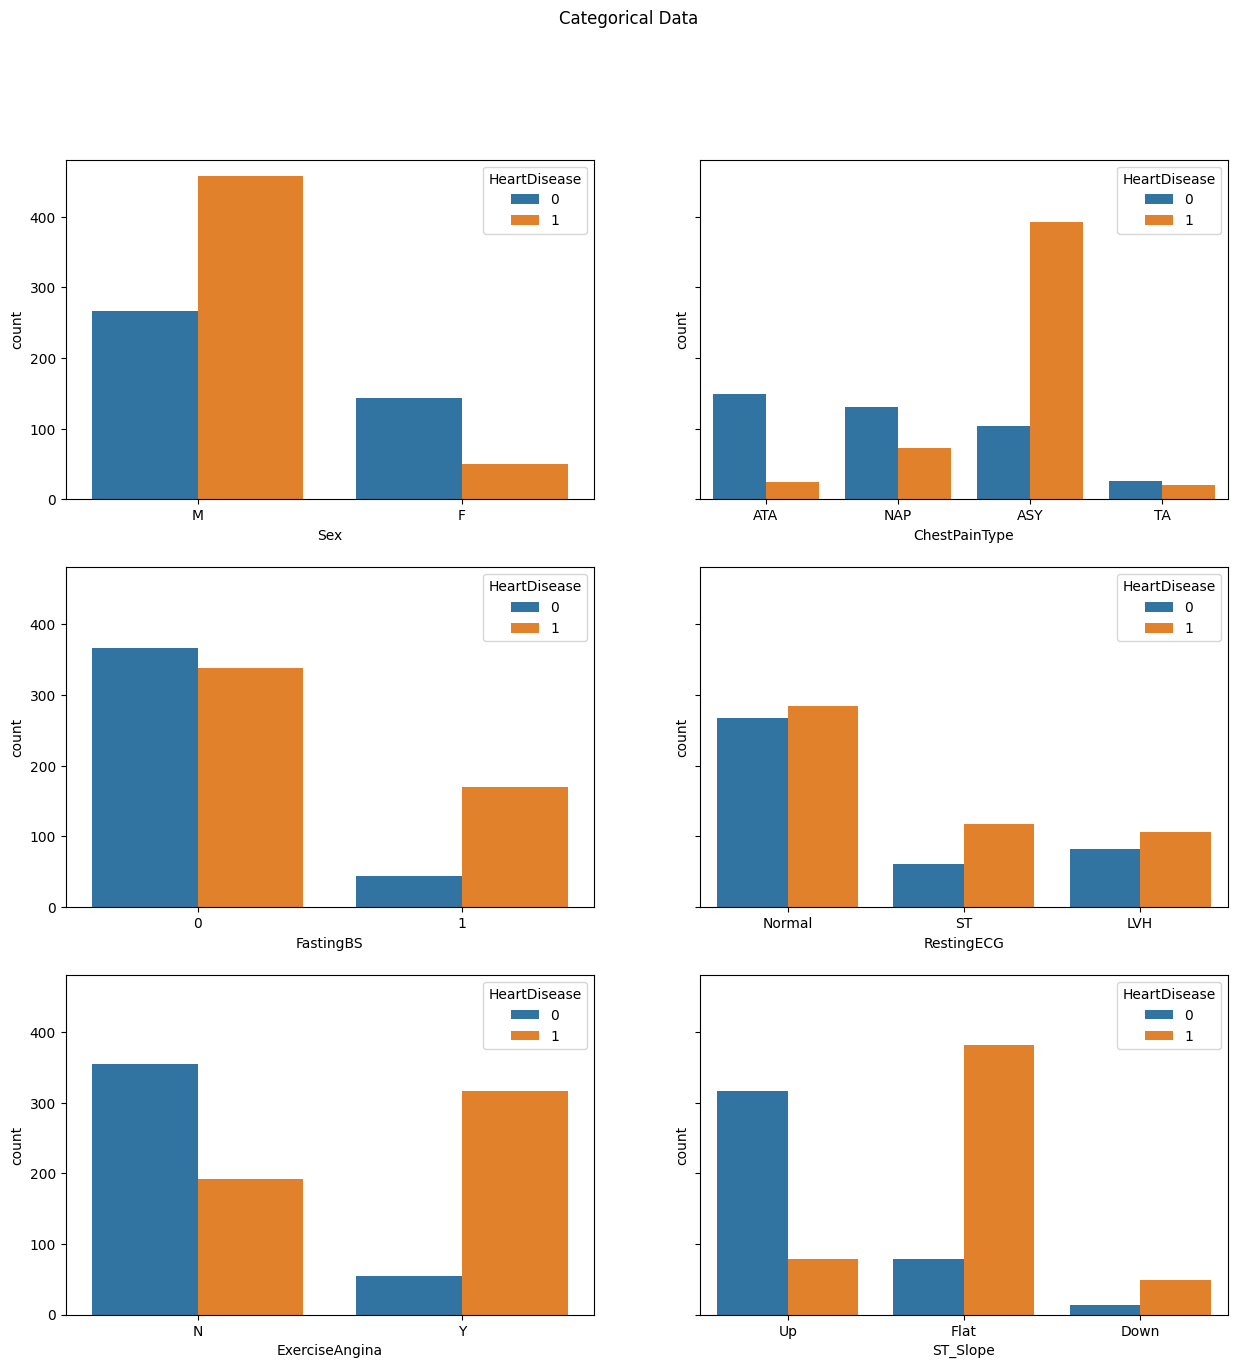

In [ ]:
fig, axes = plt.subplots(3,2,figsize = (15,15),sharey=True)
fig.suptitle('Categorical Data')
# Age,RestingBP,Cholesterol,MaxHR,Oldpeak
sns.countplot(ax = axes[0,0],x = df.Sex, hue=df.HeartDisease)
# Male have higher heart disease to healthy ratio

sns.countplot(ax = axes[0,1],x = df.ChestPainType, hue=df.HeartDisease)
# ASY has highest occurence of heart disease

sns.countplot(ax = axes[1,0],x = df.FastingBS, hue=df.HeartDisease)
# FastingBS = 1 aka > 120 mg/dL has higher occurance ratio of heart disease

sns.countplot(ax = axes[1,1],x = df.RestingECG, hue=df.HeartDisease)
# ST has highest occurance ratio of heart disease followed by LVH

sns.countplot(ax = axes[2,0],x = df.ExerciseAngina, hue=df.HeartDisease)
# Patients/Subjects with Exercise Angina have higher occurance of heart disease

sns.countplot(ax = axes[2,1],x = df.ST_Slope, hue=df.HeartDisease)
# Flat ST_Slope has highest occurance of heart disease

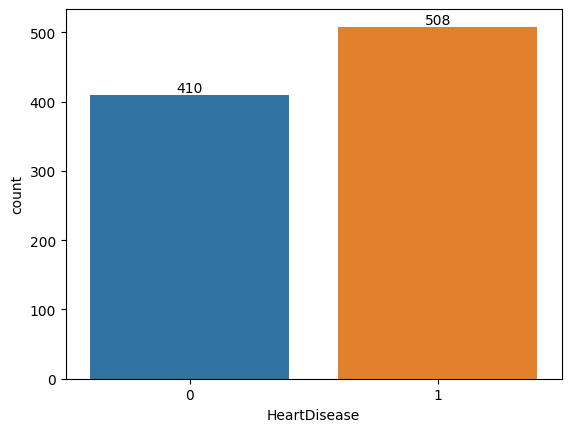

In [ ]:
fig = sns.countplot(x = df.HeartDisease)
for i in fig.containers:fig.bar_label(i,)
# Since there is no significant difference in the target data we can treat this dataset as balanced

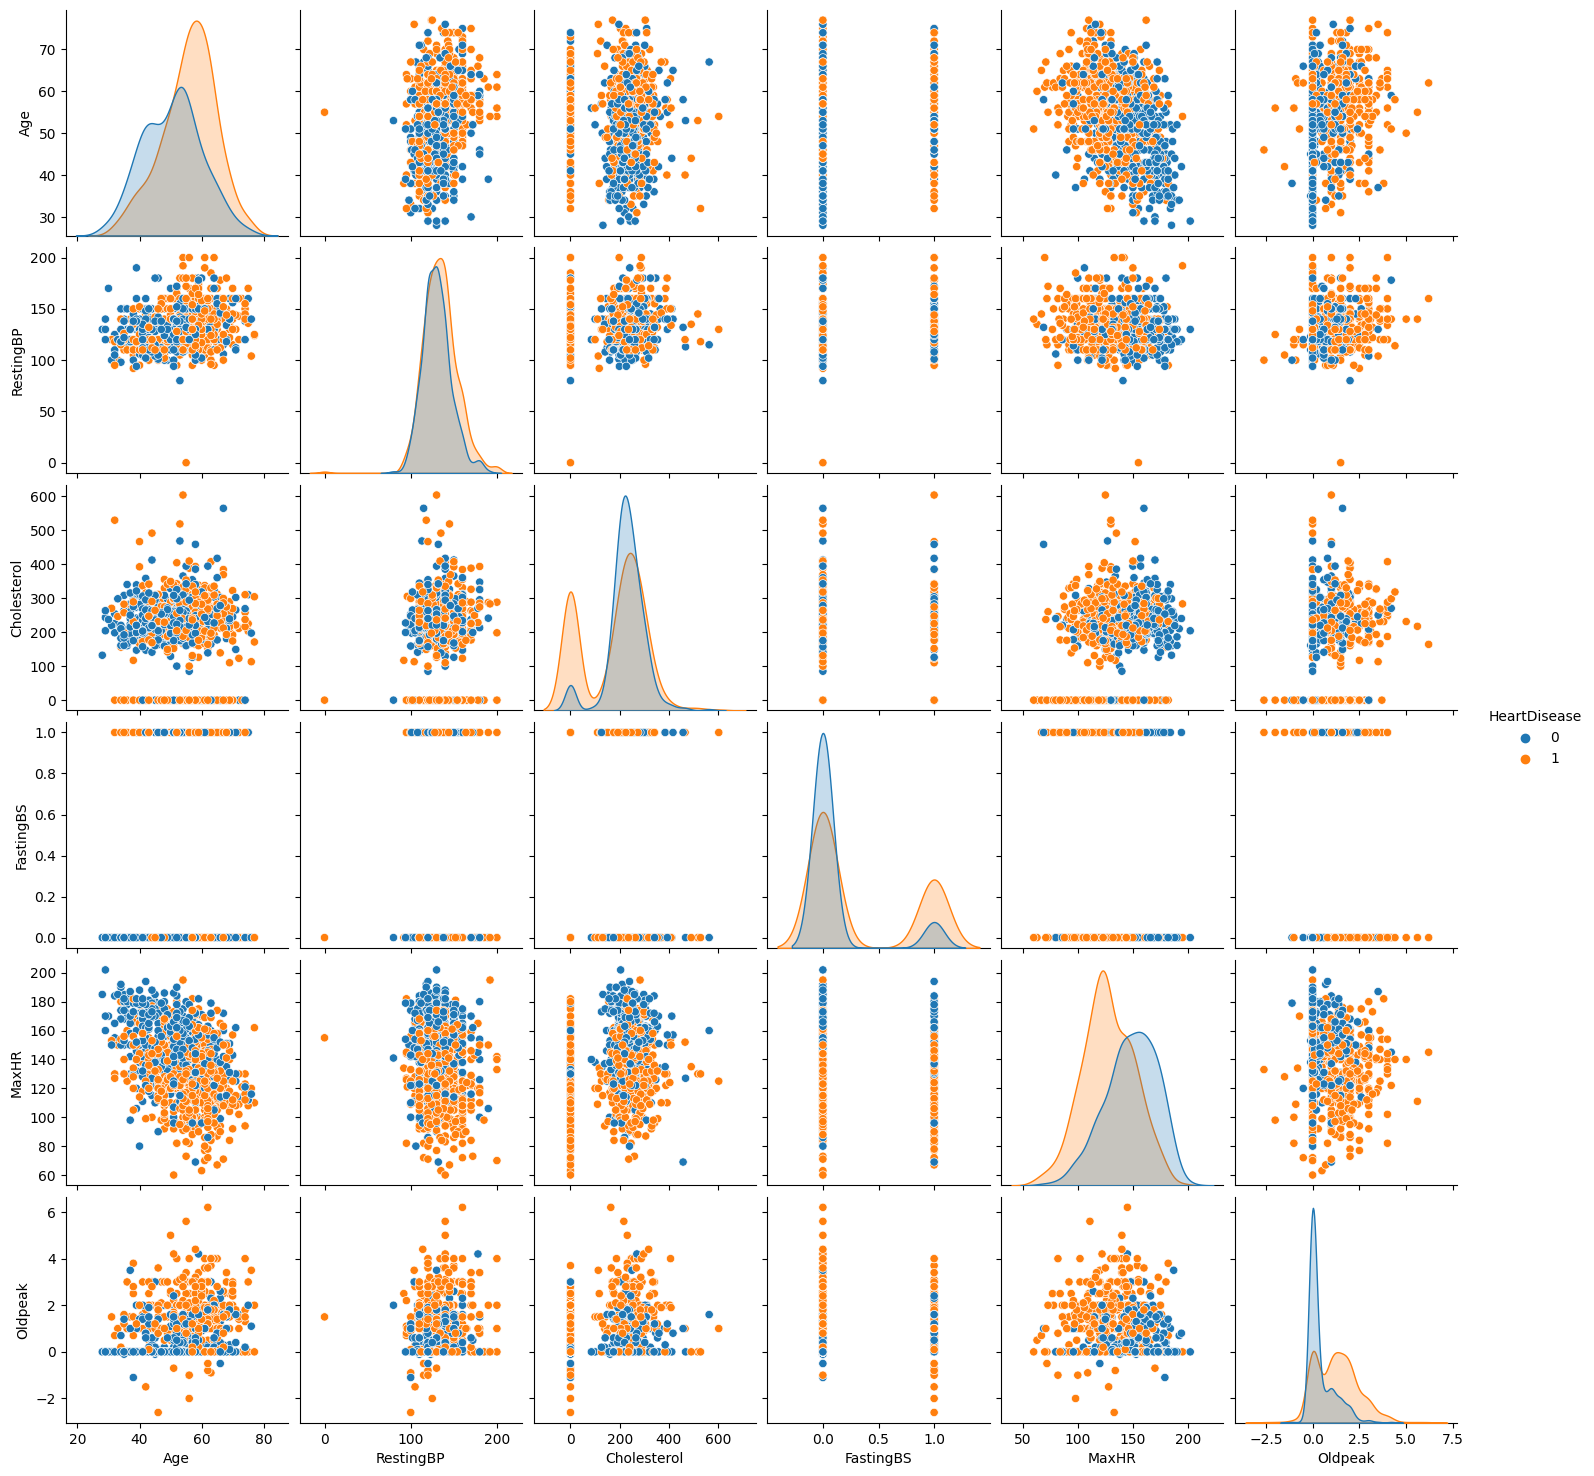

In [ ]:
# Pairplot
sns.pairplot(df, hue='HeartDisease')

### Data Cleaning

#### Scaling of Numerical Features

In [ ]:
num = ['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']
cat = ['Sex', 'ChestPainType', 'FastingBS','RestingECG', 'ExerciseAngina','ST_Slope','HeartDisease']
df_num = df[num]
df_cat = df[cat]
df_cat.head()

,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope,HeartDisease
0,M,ATA,0,Normal,N,Up,0
1,F,NAP,0,Normal,N,Flat,1
2,M,ATA,0,ST,N,Up,0
3,F,ASY,0,Normal,Y,Flat,1
4,M,NAP,0,Normal,N,Up,0


In [ ]:
# Scaling using RobustScaler
df_scaled = pd.DataFrame(RobustScaler().fit_transform(df_num),columns= df_num.columns)
# df_scaled = pd.DataFrame(transformer.transform(df_num), columns= df_num.columns)

# separate df into numerical and categorical dfs
# perform scaling on numerical
# concat both dfs back together

In [ ]:
df_normed = pd.DataFrame(MinMaxScaler().fit_transform(df_scaled),columns = df_scaled.columns)
df_normed.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
0,0.244898,0.70,0.479270,0.788732,0.295455
1,0.428571,0.80,0.298507,0.676056,0.409091
2,0.183673,0.65,0.469320,0.267606,0.295455
3,0.408163,0.69,0.354892,0.338028,0.465909
4,0.530612,0.75,0.323383,0.436620,0.295455


In [ ]:
# Join df_num and df_cat
df = pd.concat([df_normed, df_cat], axis=1)
df.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope,HeartDisease
0,0.244898,0.70,0.479270,0.788732,0.295455,M,ATA,0,Normal,N,Up,0
1,0.428571,0.80,0.298507,0.676056,0.409091,F,NAP,0,Normal,N,Flat,1
2,0.183673,0.65,0.469320,0.267606,0.295455,M,ATA,0,ST,N,Up,0
3,0.408163,0.69,0.354892,0.338028,0.465909,F,ASY,0,Normal,Y,Flat,1
4,0.530612,0.75,0.323383,0.436620,0.295455,M,NAP,0,Normal,N,Up,0


In [ ]:
df.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope,HeartDisease
0,0.244898,0.70,0.479270,0.788732,0.295455,M,ATA,0,Normal,N,Up,0
1,0.428571,0.80,0.298507,0.676056,0.409091,F,NAP,0,Normal,N,Flat,1
2,0.183673,0.65,0.469320,0.267606,0.295455,M,ATA,0,ST,N,Up,0
3,0.408163,0.69,0.354892,0.338028,0.465909,F,ASY,0,Normal,Y,Flat,1
4,0.530612,0.75,0.323383,0.436620,0.295455,M,NAP,0,Normal,N,Up,0


#### Categorical to Numerical

In [ ]:
# Making Sex colum numerical with dummies
sex_Dummies = pd.get_dummies(df["Sex"], prefix='Sex')
df = df.drop('Sex', axis=1)
df = df.join(sex_Dummies)
column1 = df.pop('Sex_M')
column2 = df.pop('Sex_F')
df.insert(1, 'Sex_M', column1)
df.insert(2, 'Sex_F', column2)
df = df.drop("Sex_F",axis=1)

In [ ]:
# Separating ChestPainType into 4 columns and making them numerical
cPain_Dummies = pd.get_dummies(df["ChestPainType"], prefix='cPainType')
df = df.drop('ChestPainType', axis=1)
df = df.join(cPain_Dummies)
column1 = df.pop('cPainType_ATA')
column2 = df.pop('cPainType_NAP')
column3 = df.pop('cPainType_ASY')
column4 = df.pop('cPainType_TA')
df.insert(3, 'cPainType_ATA', column1)
df.insert(4, 'cPainType_NAP', column2)
df.insert(5, 'cPainType_ASY', column3)
df.insert(6, 'cPainType_TA', column4)


In [ ]:
# Separating RestingECG into 3 columns and making them numerical
restECG_Dummies = pd.get_dummies(df["RestingECG"], prefix='RestECG')
df = df.drop('RestingECG', axis=1)
df = df.join(restECG_Dummies)

In [ ]:
# Rearranging new dummy columns
column1 = df.pop('RestECG_LVH')
column2 = df.pop('RestECG_Normal')
column3 = df.pop('RestECG_ST')
df.insert(8, 'RestECG_Normal', column1)
df.insert(9, 'RestECG_LVH', column2)
df.insert(10, 'RestECG_ST', column3)

In [ ]:
# Making ExerciseAngina binary numerical values where Y=1 and N=0
df["ExerciseAngina"] = (df["ExerciseAngina"] == "Y").astype(int)

In [ ]:
# Separating ST_Slope into 3 columns and making them numerical
stSlope_Dummies = pd.get_dummies(df["ST_Slope"], prefix='ST_Slope')
df = df.drop('ST_Slope', axis=1)
df = df.join(stSlope_Dummies)

In [ ]:
# Rearranging new dummy columns
column1 = df.pop('ST_Slope_Up')
column2 = df.pop('ST_Slope_Flat')
column3 = df.pop('ST_Slope_Down')
df.insert(16, 'ST_Slope_Up', column1)
df.insert(17, 'ST_Slope_Flat', column2)
df.insert(18, 'ST_Slope_Down', column3)

colHD = df.pop('HeartDisease')
df.insert(18, 'HeartDisease', colHD)

In [ ]:
df.head()

,Age,Sex_M,RestingBP,cPainType_ATA,cPainType_NAP,cPainType_ASY,cPainType_TA,Cholesterol,RestECG_Normal,RestECG_LVH,RestECG_ST,MaxHR,Oldpeak,FastingBS,ExerciseAngina,ST_Slope_Up,ST_Slope_Flat,ST_Slope_Down,HeartDisease
0,0.244898,1,0.70,1,0,0,0,0.479270,0,1,0,0.788732,0.295455,0,0,1,0,0,0
1,0.428571,0,0.80,0,1,0,0,0.298507,0,1,0,0.676056,0.409091,0,0,0,1,0,1
2,0.183673,1,0.65,1,0,0,0,0.469320,0,0,1,0.267606,0.295455,0,0,1,0,0,0
3,0.408163,0,0.69,0,0,1,0,0.354892,0,1,0,0.338028,0.465909,0,1,0,1,0,1
4,0.530612,1,0.75,0,1,0,0,0.323383,0,1,0,0.436620,0.295455,0,0,1,0,0,0


### Correlation

<AxesSubplot: >

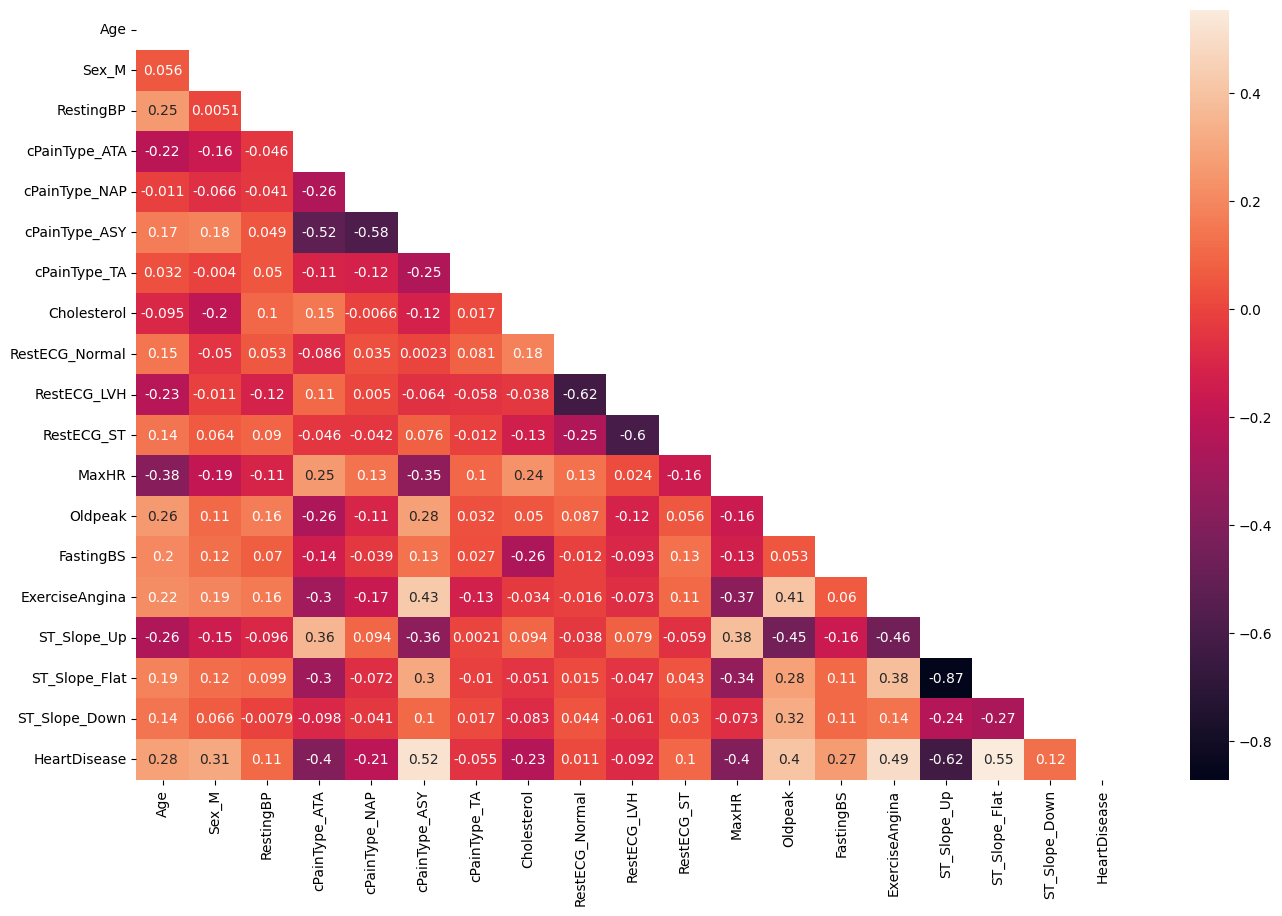

In [ ]:
c = df.corr()
plt.figure(figsize = (16,10))
mask = np.triu(np.ones_like(c, dtype=bool))
sns.heatmap(c, annot=True, mask = mask)

In [ ]:
df.head()

,Age,Sex_M,RestingBP,cPainType_ATA,cPainType_NAP,cPainType_ASY,cPainType_TA,Cholesterol,RestECG_Normal,RestECG_LVH,RestECG_ST,MaxHR,Oldpeak,FastingBS,ExerciseAngina,ST_Slope_Up,ST_Slope_Flat,ST_Slope_Down,HeartDisease
0,0.244898,1,0.70,1,0,0,0,0.479270,0,1,0,0.788732,0.295455,0,0,1,0,0,0
1,0.428571,0,0.80,0,1,0,0,0.298507,0,1,0,0.676056,0.409091,0,0,0,1,0,1
2,0.183673,1,0.65,1,0,0,0,0.469320,0,0,1,0.267606,0.295455,0,0,1,0,0,0
3,0.408163,0,0.69,0,0,1,0,0.354892,0,1,0,0.338028,0.465909,0,1,0,1,0,1
4,0.530612,1,0.75,0,1,0,0,0.323383,0,1,0,0.436620,0.295455,0,0,1,0,0,0


### Factor Analysis

#### Scree Plot

In [ ]:
# Remove HeartDisease column
dfX = df.drop(['HeartDisease'], axis=1)
dfY = df[['HeartDisease']]

fa = FactorAnalyzer()
fa.fit(dfX)

# Find the eigenvalues
ev, v = fa.get_eigenvalues()

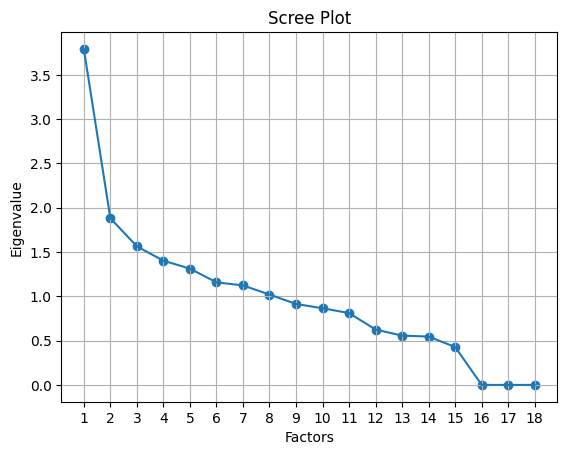

In [ ]:
# Graph the scree plot
factors = list(range(1, len(dfX.columns) + 1))
#factors = dfX.columns
plt.scatter(factors,ev)
plt.plot(factors,ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.xticks(factors,rotation = 0)
plt.grid(visible=True,axis='both')
plt.show()

In [ ]:
# Show eigenvalues of all factors
ev

array([ 3.79275489e+00,  1.88135963e+00,  1.56393315e+00,  1.40217194e+00,
        1.31285387e+00,  1.15782628e+00,  1.12322062e+00,  1.02030152e+00,
        9.13615971e-01,  8.65658884e-01,  8.10871817e-01,  6.24847877e-01,
        5.56635594e-01,  5.45721524e-01,  4.28226448e-01,  9.39737429e-16,
        7.68855570e-16, -1.67877563e-15])

In [ ]:
# List of factors that have eigenvalues greater than specified
eLst = ev[ev>=0.5]
eLst

array([3.79275489, 1.88135963, 1.56393315, 1.40217194, 1.31285387,
       1.15782628, 1.12322062, 1.02030152, 0.91361597, 0.86565888,
       0.81087182, 0.62484788, 0.55663559, 0.54572152])

In [ ]:
# Find each feature's percent of total variability
lstVariability = []
for e in eLst:
    lstVariability.append((e / len(ev)) * 100)

lstVariability

[21.070860484876686,
 10.45199795268879,
 8.688517474956045,
 7.789844102148264,
 7.2936326150827275,
 6.432368209316744,
 6.240114549582437,
 5.668341751140024,
 5.075644284275904,
 4.809216023370458,
 4.504843427465048,
 3.4713770928884364,
 3.092419968814399,
 3.031786241828511]

In [ ]:
# Show total percent variability from keeping factors specified in eLst
sum(lstVariability)

97.62096417843446

In [ ]:
# Build the factor model
nFactors = len(eLst) #8 #len(dfX.columns)
fa = FactorAnalyzer(rotation="varimax", n_factors = nFactors)
# fa = FactorAnalyzer()
fa.fit(dfX)

FactorAnalyzer(n_factors=14, rotation='varimax', rotation_kwargs={})

In [ ]:
factorCols = []
for f in list(range(1, nFactors + 1)):
    factorCols.append(f'F{f}')

# Obtain the factor loadings
fa.loadings_
loadings = pd.DataFrame(fa.loadings_, columns=factorCols, index=dfX.columns)


# Obtain the communalities
fa.get_communalities()
communalities = pd.DataFrame(fa.get_communalities(), index=dfX.columns, columns=['Communality'])

In [ ]:
# Show Loadings
loadings

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14
Age,0.092945,0.148783,-0.011869,0.063389,0.086230,0.071379,0.020448,0.508462,0.231604,0.374513,0.194720,-0.066154,-0.113188,0.059901
Sex_M,0.068804,-0.021001,0.052601,0.018731,0.074823,0.023501,-0.001218,0.067943,0.152335,-0.015967,0.046314,0.417734,0.013375,0.001576
RestingBP,0.048677,0.034021,0.018051,0.051334,0.006132,-0.013702,0.027670,0.084761,0.008835,0.499160,0.061705,-0.004285,0.021573,-0.004756
cPainType_ATA,-0.189807,-0.057214,0.117186,-0.014822,-0.937716,-0.037781,-0.084940,-0.119149,-0.118497,-0.023743,-0.094668,-0.129673,-0.021124,-0.000078
cPainType_NAP,-0.038053,0.016620,-0.970183,-0.013766,0.185914,-0.016093,-0.110762,-0.036926,-0.008689,-0.029569,-0.033703,-0.049757,-0.014154,-0.000003
cPainType_ASY,0.183528,0.012995,0.707368,0.023354,0.567054,0.039161,-0.276040,0.143463,0.092538,0.021574,0.101883,0.147203,0.035937,-0.000118
cPainType_TA,-0.006622,0.041257,0.019591,-0.000593,0.031882,0.008879,0.993522,-0.043898,0.017549,0.049525,0.001071,-0.009172,-0.017303,0.000415
Cholesterol,-0.001115,0.114516,0.015452,-0.058046,-0.052851,-0.017875,0.000814,-0.194991,-0.495971,0.235008,0.033570,-0.245199,0.027419,0.063561
RestECG_Normal,0.015526,0.981227,-0.013869,-0.141281,0.038281,0.023833,0.036598,-0.027719,-0.058204,0.053855,0.024851,-0.046556,-0.006025,0.002326
RestECG_LVH,-0.023324,-0.724381,-0.005397,-0.674461,-0.037524,-0.024082,-0.022817,-0.035878,-0.043440,-0.100784,-0.033077,0.002460,-0.002001,-0.001437


In [ ]:
# Show Communalities
communalities

,Communality
Age,0.559009
Sex_M,0.219350
RestingBP,0.268216
cPainType_ATA,0.996231
cPainType_NAP,0.996386
cPainType_ASY,0.996999
cPainType_TA,0.995383
Cholesterol,0.425115
RestECG_Normal,0.996457
RestECG_LVH,0.997145


In [ ]:
# Drop ST SLOPE FLAT due to high correlation
df = df.drop(['ST_Slope_Flat'], axis=1)

### Machine Learning

In [ ]:
# X and Y data
x = df.drop(['HeartDisease'], axis=1)
y = df.HeartDisease

In [ ]:
x.head()

,Age,Sex_M,RestingBP,cPainType_ATA,cPainType_NAP,cPainType_ASY,cPainType_TA,Cholesterol,RestECG_Normal,RestECG_LVH,RestECG_ST,MaxHR,Oldpeak,FastingBS,ExerciseAngina,ST_Slope_Up,ST_Slope_Down
0,0.244898,1,0.70,1,0,0,0,0.479270,0,1,0,0.788732,0.295455,0,0,1,0
1,0.428571,0,0.80,0,1,0,0,0.298507,0,1,0,0.676056,0.409091,0,0,0,0
2,0.183673,1,0.65,1,0,0,0,0.469320,0,0,1,0.267606,0.295455,0,0,1,0
3,0.408163,0,0.69,0,0,1,0,0.354892,0,1,0,0.338028,0.465909,0,1,0,0
4,0.530612,1,0.75,0,1,0,0,0.323383,0,1,0,0.436620,0.295455,0,0,1,0


#### Hyperparameter Tuning

In [ ]:
# Parameter Tuning Model: LG
param_lg = {'C': np.logspace(-3,3,7),'penalty': ['l1', 'l2']}
grid_lg = GridSearchCV(LogisticRegression(), param_lg, cv=5).fit(x,y)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
35 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 61, 

In [42]:
# Parameter Tuning Models: SVM, RF, KNN, DT
param_svm = {'C': np.logspace(-3,3,7), 'gamma': [1,0.1,0.01,0.001],'kernel': ['linear','rbf', 'poly', 'sigmoid']}
param_rf = {'n_estimators':[10,50,100,150, 200],'max_depth':[5,7,10,13,16,20,40]}
param_knn = {'n_neighbors': np.arange(9, 30, 2),'weights': ['uniform', 'distance']}
param_dt = {'max_depth': [5,7,10,13,16,20,40],'min_samples_leaf': [1, 3, 5]}
param_xg = {'max_depth': [3, 5, 7],'learning_rate': [0.1, 0.5, 1.0]}
grid_svm = GridSearchCV(svm.SVC(),param_svm,cv = 5).fit(x,y)
grid_rf = GridSearchCV(RandomForestClassifier(),param_rf,cv = 5).fit(x,y)
grid_knn = GridSearchCV(KNeighborsClassifier(),param_knn,cv = 5).fit(x,y)
grid_dt = GridSearchCV(DecisionTreeClassifier(),param_dt,cv = 5).fit(x,y)

In [ ]:
print(grid_lg.best_estimator_)
print(grid_svm.best_estimator_) # since no kernel was output we assume kernels performed equally well
print(grid_rf.best_estimator_)
print(grid_knn.best_estimator_)
print(grid_dt.best_estimator_)

LogisticRegression(C=0.1)
SVC(C=0.1, gamma=1, kernel='linear')
RandomForestClassifier(max_depth=10)
KNeighborsClassifier(n_neighbors=11)
DecisionTreeClassifier(max_depth=5)


#### Modeling and Evaluation

In [ ]:
def modelAverages(model, modelName, fData):

    lstAcc = []
    lstRec = []
    lstPre = []
    lstF1 = []
    lstResults = []

    x = fData.drop(['HeartDisease'], axis=1)
    y = fData.HeartDisease

    i = 0
    while i < 50:

        # Train Test Split
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, shuffle=True)

        model.fit(x_train, y_train)
        Ypred = model.predict(x_test)

        acc = accuracy_score(y_test,Ypred)
        rec = recall_score(y_test,Ypred,pos_label = 1)
        pre = precision_score(y_test,Ypred, pos_label = 1)
        f1 = f1_score(y_test,Ypred, pos_label = 1)

        lstAcc.append(acc)
        lstRec.append(rec)
        lstPre.append(pre)
        lstF1.append(f1)

        i += 1

    avgAcc = round(mean(lstAcc) * 100,2)
    avgRec = round(mean(lstRec) * 100, 2)
    avgPre = round(mean(lstPre) * 100, 2)
    avgF1 = round(mean(lstF1) * 100, 2)

    sdAcc = round(stdev(lstAcc) * 100, 2)
    sdRec = round(stdev(lstRec) * 100, 2)
    sdPre = round(stdev(lstPre) * 100, 2)
    sdF1 = round(stdev(lstF1) * 100, 2)

    lstResults.append(modelName)
    lstResults.append(avgAcc)
    lstResults.append(avgRec)
    lstResults.append(avgPre)
    lstResults.append(avgF1)

    lstResults.append(sdAcc)
    lstResults.append(sdRec)
    lstResults.append(sdPre)
    lstResults.append(sdF1)

    return lstResults, x, y, x_train, x_test, y_train, y_test, Ypred



In [ ]:
rfcAverage = modelAverages(RandomForestClassifier(max_depth=17, n_estimators=200), 'Random Forest', df )
lrAverage = modelAverages(LogisticRegression(C=10.0), 'Linear Regression', df )
svAverage = modelAverages(svm.SVC(kernel = 'linear',C=0.1, gamma=1), 'SVM', df ) # use linear kernel for simplicity
knnAverage = modelAverages(KNeighborsClassifier(n_neighbors=11, weights='distance', p=2, metric='euclidean'), 'KNN', df)
dtAverage = modelAverages(DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=5),'Decision Tree', df)

In [ ]:
eval_list = [lrAverage[0],svAverage[0],rfcAverage[0],knnAverage[0],dtAverage[0]]
df_eval2 = pd.DataFrame(eval_list, columns=['Model','Accuracy', 'Recall', 'Precision', 'F1', 'Acc_SD', 'Rec_SD', 'Pre_SD', 'F1_SD'])
df_eval2

,Model,Accuracy,Recall,Precision,F1,Acc_SD,Rec_SD,Pre_SD,F1_SD
0,Linear Regression,86.46,88.98,87.13,88.01,1.53,2.33,2.36,1.45
1,SVM,85.53,90.15,84.60,87.26,2.17,2.83,2.45,2.10
2,Random Forest,87.12,90.09,87.14,88.55,1.52,2.27,2.38,1.40
3,KNN,85.61,88.52,86.01,87.21,1.54,2.45,2.20,1.42
4,Decision Tree,82.63,84.58,84.36,84.40,1.78,3.07,2.89,1.79


In [ ]:
#SVM:
x = svAverage[1] 
y = svAverage[2]
x_train = svAverage[3]
x_test = svAverage[4]
y_train = svAverage[5]
y_test = svAverage[6]
pred = svAverage[7]
sv_acc = svAverage[0][1]
sv_rec = svAverage[0][2]
sv_pre = svAverage[0][3]
sv_f1 = svAverage[0][4]

In [ ]:
# SVM
sv = svm.SVC(kernel = 'linear',C=0.1, gamma=0.1).fit(x_train, y_train) # by default rbf kernel
pred2 = sv.predict(x_test)
# sv_acc = accuracy_score(y_test,pred)
# sv_rec = recall_score(y_test,pred,pos_label = 0)
# sv_pre = precision_score(y_test,pred, pos_label = 0)
# sv_f1 = f1_score(y_test,pred, pos_label = 0)
print('Accuracy score is %.2f' % sv_acc)
print('Recall score is %.2f' % sv_rec)
print('Precision score is %.2f' % sv_pre)
print('F1 score is %.2f' % sv_f1)

Accuracy score is 85.83
Recall score is 89.41
Precision score is 85.62
F1 score is 87.43


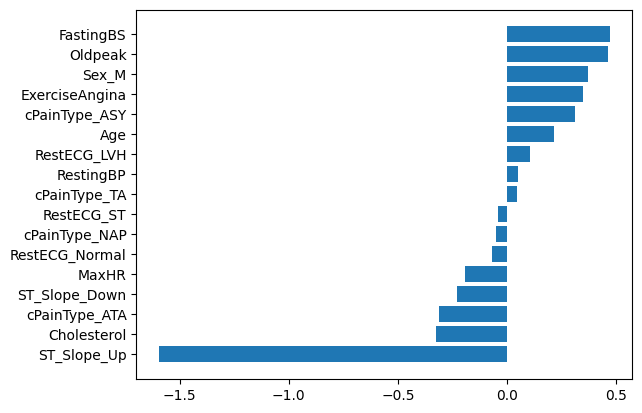

In [ ]:
# SVM absolute feature importance
# this function pasted from stackoverflow
# https://stackoverflow.com/questions/41592661/determining-the-most-contributing-features-for-svm-classifier-in-sklearn

def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()
features_names = x.columns
f_importances(sv.coef_[0], features_names)

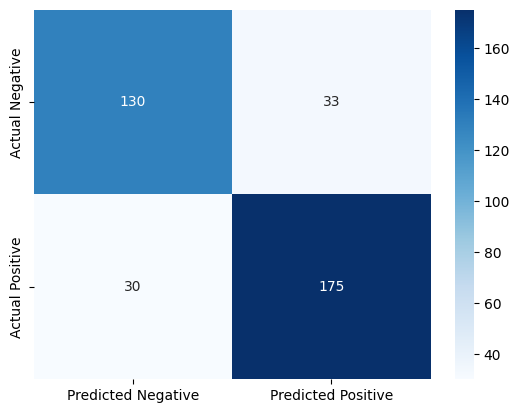

In [ ]:
# Create a heatmap of the confusion matrix
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xticks([0.5, 1.5], ['Predicted Negative', 'Predicted Positive'])
plt.yticks([0.5, 1.5], ['Actual Negative', 'Actual Positive']);

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a2d711d0-7aa8-42d0-9772-9d55d9022099' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>